## Autoencoder

An autoencoder is an unsupervised learning technique for nueral network that learns efficient data representation(encoding) by training the network to ignore signal "noise". Autoencoders can be used for image denoising image compression,and,in some cases, even generation of image data.

## 1.Image Compression

## Flow of Autoencoder

Input Image ->Encoder -> Compressed Representation ->Decoder->Reconstruct Input Image

In [1]:
# Importing Modules
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist

In [2]:
# loading the data
(x_train,_),(x_test,_) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# normalizing the image data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [4]:
# reshaping the input data for the model
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

In [5]:
x_test.shape

(10000, 28, 28, 1)

## EDA

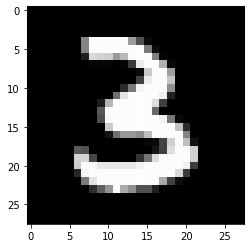

In [6]:
index = np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

## Model Creation


In [7]:
model = Sequential([
    # encoder network
    Conv2D(32,3,activation='relu',padding='same',input_shape=(28,28,1)),
    MaxPooling2D(2,padding='same'),
    Conv2D(16,3,activation='relu',padding='same'),
    MaxPooling2D(2,padding='same'),
    
    # decoder netwrok
    Conv2D(16,3,activation='relu',padding='same'),
    UpSampling2D(2),
    Conv2D(32,3,activation='relu',padding='same'),
    UpSampling2D(2),
    
    # output layer
    Conv2D(1,3,activation='sigmoid',padding='same')
    
])

model.compile(optimizer='adam',loss='binary_crossentropy')
model.summary()

2023-01-27 11:09:49.672784: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-27 11:09:49.775319: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-27 11:09:49.776118: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        4

2023-01-27 11:09:49.778652: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-27 11:09:49.779008: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-27 11:09:49.780083: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-27 11:09:49.781079: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [8]:
# training the model
model.fit(x_train,x_train, epochs=20, batch_size=256, validation_data=(x_test,x_test))

2023-01-27 11:09:53.293615: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2023-01-27 11:09:54.702448: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


235/235 [==============================] - 9s 9ms/step - loss: 0.1678 - val_loss: 0.0889
Epoch 2/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0847 - val_loss: 0.0802
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0792 - val_loss: 0.0768
Epoch 4/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0767 - val_loss: 0.0753
Epoch 5/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0751 - val_loss: 0.0738
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0740 - val_loss: 0.0728
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0731 - val_loss: 0.0721
Epoch 8/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0724 - val_loss: 0.0715
Epoch 9/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0718 - val_loss: 0.0709
Epoch 10/20
235/235 [==============================] - 2s 8ms/step - loss: 0.0713 - val_loss: 0.0705
Epoch 11/2

## Visualizing the Results

In [9]:
# predicting the results from model(getting compressed images)
pred = model.predict(x_test)


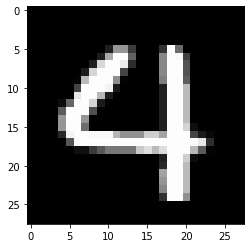

In [10]:
# visualizing the original image
index = np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

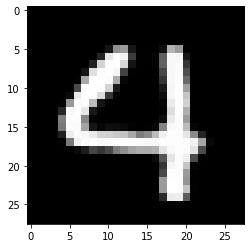

In [11]:
# visualizing compressed image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

<function matplotlib.pyplot.show(close=None, block=None)>

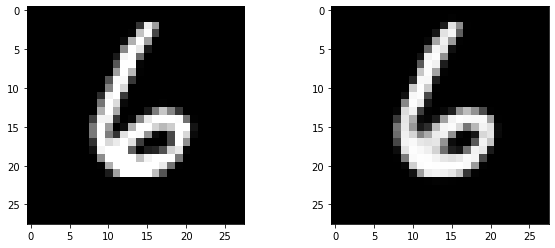

In [12]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10,4))
# displaying original image
ax=plt.subplot(1,2,1)
plt.imshow(x_test[index].reshape(28,28))
plt.gray()


# displaying predicted image
ax=plt.subplot(1,2,2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()

plt.show

## 2.Denoising Image

## Flow of Autoencoder

Noise Image ->Encoder -> Compressed Representation ->Decoder->Reconstruct Input Image

In [13]:
# loading the data
(x_train,_),(x_test,_) = mnist.load_data()

In [14]:
# normalizing the image data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [15]:
# reshaping the input data for the model
x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

## Adding noise to the image

In [16]:
noise_factor = 0.6
x_train_noisy = x_train + noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy = x_test + noise_factor*np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)

In [17]:
#x_train[0]

In [18]:
#x_train_noisy[0]

In [19]:
# cliping the values in the range 0-1
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

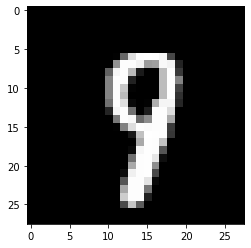

In [20]:
# Original image
index = np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape(28,28))
plt.gray()

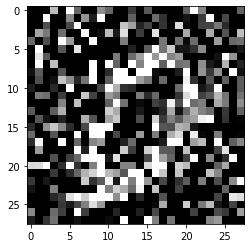

In [21]:
# Noisy image
index = np.random.randint(len(x_test))
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

## Model Creation

In [22]:
model = Sequential([
    # encoder network
    Conv2D(32,3,activation='relu',padding='same',input_shape=(28,28,1)),
    MaxPooling2D(2,padding='same'),
    Conv2D(16,3,activation='relu',padding='same'),
    MaxPooling2D(2,padding='same'),
    
    # decoder netwrok
    Conv2D(16,3,activation='relu',padding='same'),
    UpSampling2D(2),
    Conv2D(32,3,activation='relu',padding='same'),
    UpSampling2D(2),
    
    # output layer
    Conv2D(1,3,activation='sigmoid',padding='same')
    
])

model.compile(optimizer='adam',loss='binary_crossentropy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 16)          2320      
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)       

In [23]:
# training the model
model.fit(x_train_noisy,x_train, epochs=20, batch_size=256, validation_data=(x_test_noisy,x_test))

Epoch 1/20
235/235 [==============================] - 2s 8ms/step - loss: 0.2536 - val_loss: 0.1555
Epoch 2/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1459 - val_loss: 0.1374
Epoch 3/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1355 - val_loss: 0.1311
Epoch 4/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1306 - val_loss: 0.1272
Epoch 5/20
235/235 [==============================] - 2s 8ms/step - loss: 0.1274 - val_loss: 0.1245
Epoch 6/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1251 - val_loss: 0.1228
Epoch 7/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1233 - val_loss: 0.1209
Epoch 8/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1217 - val_loss: 0.1199
Epoch 9/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1205 - val_loss: 0.1186
Epoch 10/20
235/235 [==============================] - 2s 7ms/step - loss: 0.1195 - val_loss: 0.1177

In [24]:
pred = model.predict(x_test)

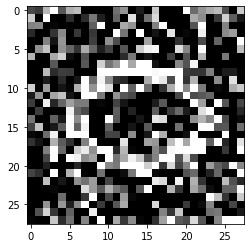

In [25]:
# visualizing the noisy image
index = np.random.randint(len(x_test))
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()

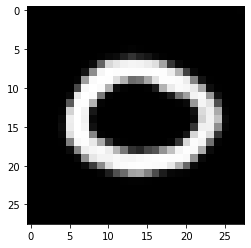

In [26]:
# visualizing the original image
plt.imshow(pred[index].reshape(28,28))
plt.gray()

<function matplotlib.pyplot.show(close=None, block=None)>

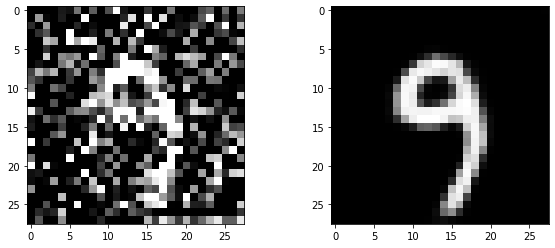

In [27]:
index = np.random.randint(len(x_test))
plt.figure(figsize=(10,4))
# displaying original image
ax=plt.subplot(1,2,1)
plt.imshow(x_test_noisy[index].reshape(28,28))
plt.gray()


# displaying predicted image
ax=plt.subplot(1,2,2)
plt.imshow(pred[index].reshape(28,28))
plt.gray()

plt.show